In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Load the trained model 
model = torch.load('./newLoss/weights.pt')
# Set the model to evaluate mode
model.eval()

c:\Users\Fred\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [ ]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('./newLoss/log.csv')

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

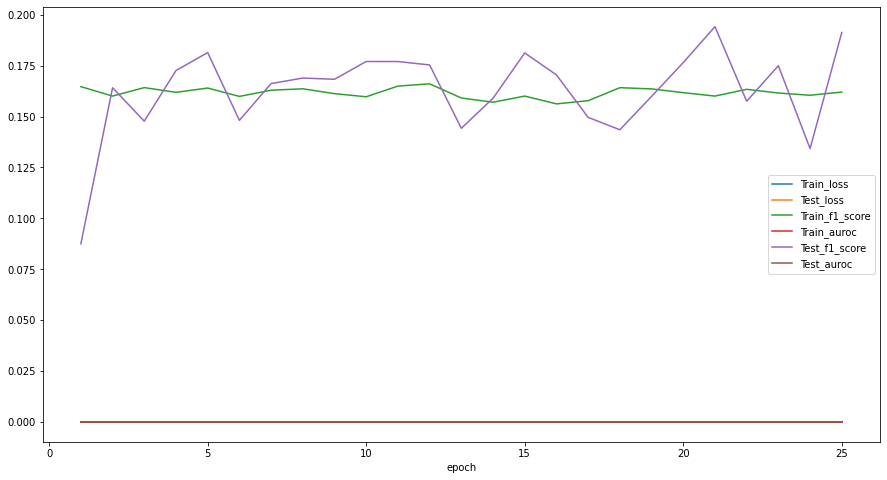

In [ ]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [ ]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.0
Test_auroc     0.0
dtype: float64


### Sample Prediction

In [ ]:
ino = 2
# Read  a sample image and mask from the data-set
img = cv2.imread('./DoorsMimicClosed/Images/Door0700.png').transpose(1,2,0).reshape(1,3,640,480)
mask = cv2.imread('./DoorsMimicClosed/Masks/Door0700.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255) #/255 makes array of numbers from 0 to 1

(array([   303.,    468.,    910.,   2038.,   7785.,  35768., 104127.,
        120052.,  33670.,   2079.]),
 array([-1.1656992e+00, -1.0199620e+00, -8.7422466e-01, -7.2848743e-01,
        -5.8275014e-01, -4.3701285e-01, -2.9127559e-01, -1.4553832e-01,
         1.9896030e-04,  1.4593624e-01,  2.9167351e-01], dtype=float32),
 <BarContainer object of 10 artists>)

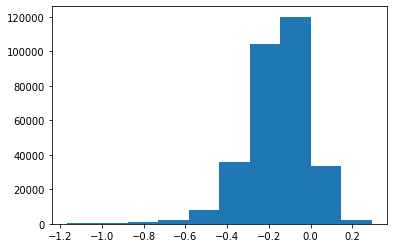

In [ ]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

(-0.5, 479.5, 639.5, -0.5)

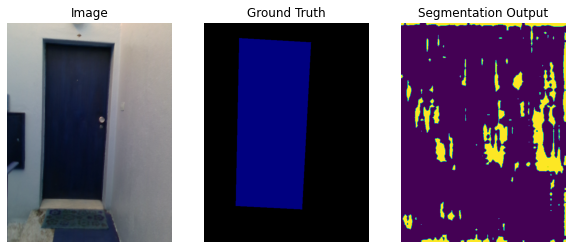

In [ ]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10))

plt.subplot(131)
plt.imshow(cv2.imread('./DoorsMimicClosed/Images/Door0700.png'))
plt.title('Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(mask)
plt.title('Ground Truth')
plt.axis('off')

plt.subplot(133)
plt.imshow(a['out'].cpu().detach().numpy()[0][0]> 0)
plt.title('Segmentation Output')
plt.axis('off')

# plt.savefig('./DoorsMediumExp/SegmentationOutput.png',bbox_inches='tight')